<a href="https://colab.research.google.com/github/Utsav9303/Machine-Leaning/blob/main/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: California Housing Price Prediction
# Author: Utsav JayeshKumar Modi (206310307005)

# Introduction
"
This notebook aims to predict California housing prices using various regression models.
We will use the California Housing Prices dataset from Kaggle and compare the
performance of Linear Regression, Random Forest, and Decision Tree models.
The objective is to identify the most suitable model for this prediction task.
"

# Data Loading and Preprocessing


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('housing.csv')
df.shape

(20640, 10)

# Display first few rows


In [ ]:
df.head()

(20640, 14)

#Get basic statistics

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#Explore the relationships between features using:

*   Histograms for individual features
*   A heatmap to show correlations between features



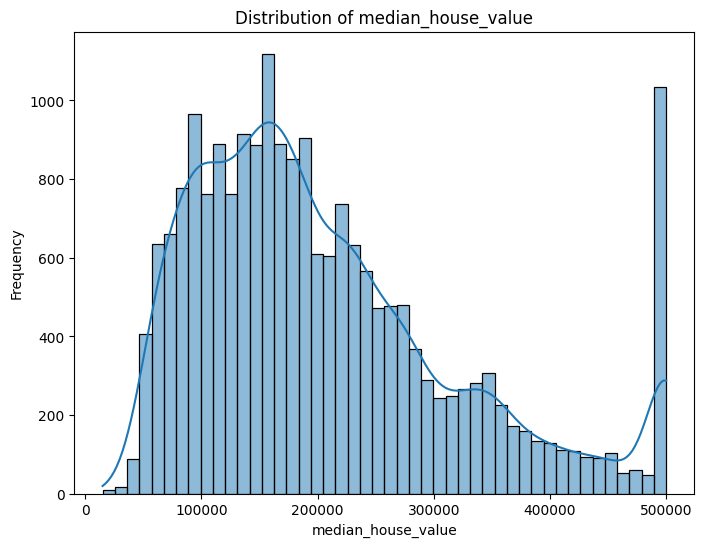

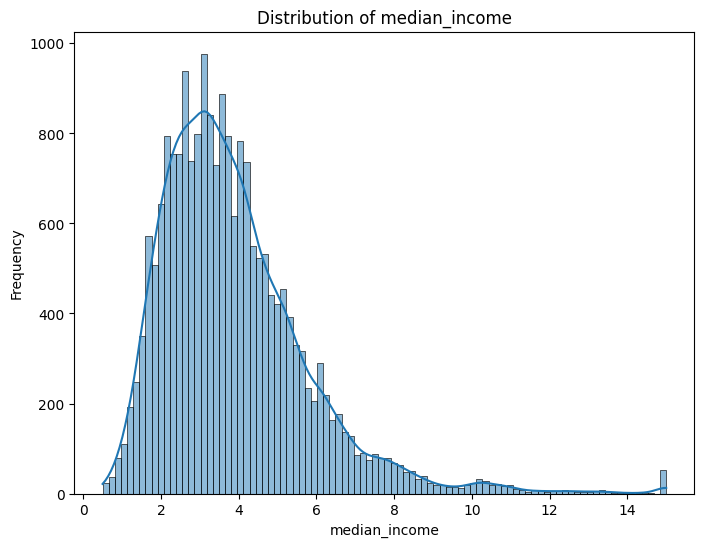

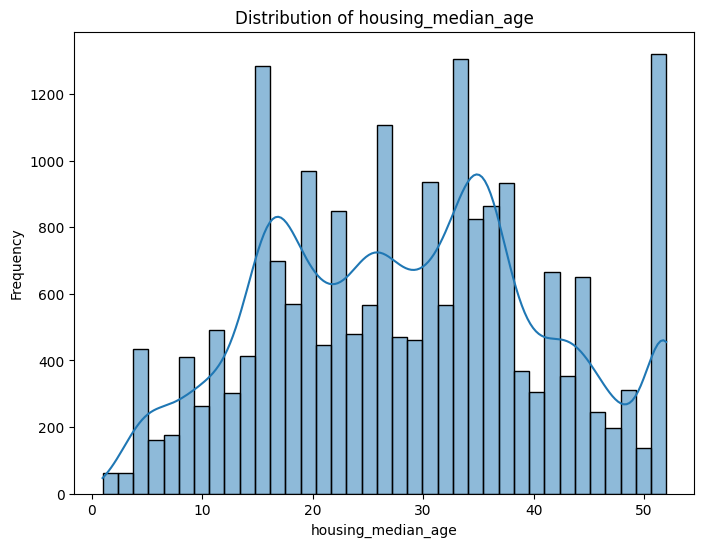

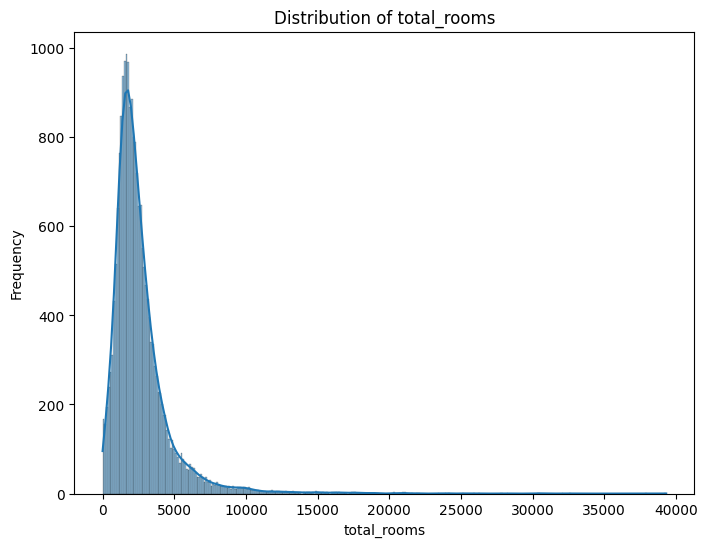

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms']

for feature in features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

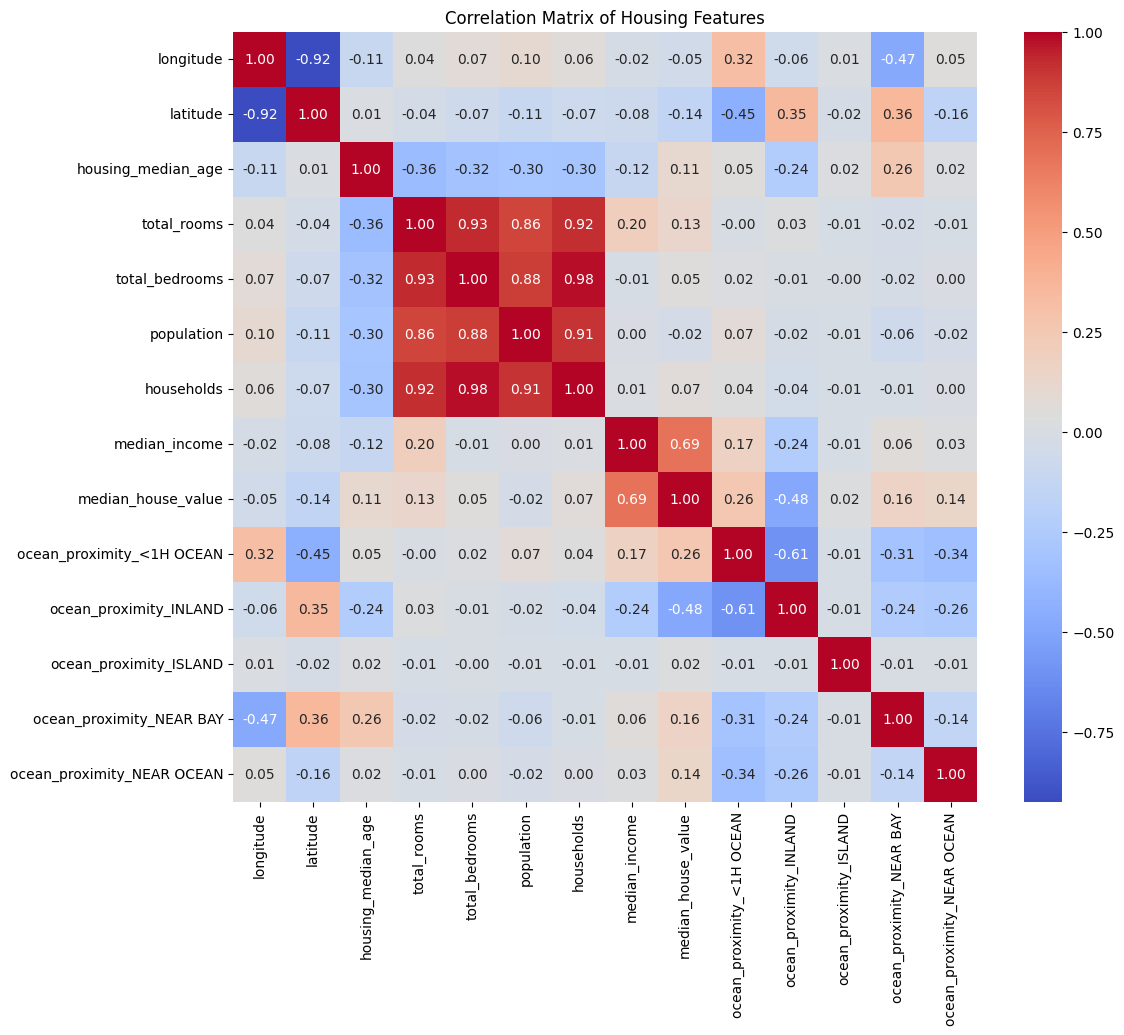

In [ ]:
ocean_proximity_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean_proximity')

df = pd.concat([df, ocean_proximity_dummies], axis=1)

df = df.drop('ocean_proximity', axis=1)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

# Check for missing values and handle them


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0


# Imputation for total_bedrooms (replace with your strategy)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


# Normalize numerical features (using MinMaxScaler)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_features = ['median_income', 'total_rooms', 'housing_median_age', 'total_bedrooms', 'population', 'households']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split data into training and testing sets


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['median_income', 'total_rooms', 'housing_median_age', 'total_bedrooms', 'population', 'households']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

#Predict the target variable (housing prices) for the test data

In [ ]:
y_pred = model.predict(X_test)

#Evaluate the model using metrics like:
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* R-squared Score

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error (MAE): 56739.985019332285
Mean Squared Error (MSE): 5963976459.533638
R-squared Score: 0.544876709594915


#Plot the predicted vs. actual housing prices using a scatter plot

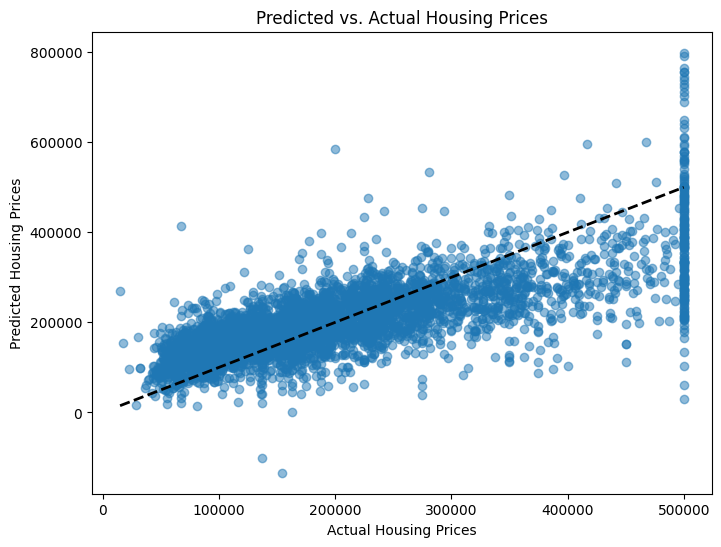

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Predicted vs. Actual Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Absolute Error: 56739.985019332285
Random Forest - Mean Squared Error: 4807996050.996447
Random Forest - R-squared: 0.633091948328168


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Absolute Error: {mae_dt}")
print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R-squared: {r2_dt}")

Decision Tree - Mean Absolute Error: 56739.985019332285
Decision Tree - Mean Squared Error: 9125057517.059109
Decision Tree - R-squared: 0.30364812294642274


# Model Comparison


1. Train more additional regression models (e.g., Decision Tree Regressor or Random Forest Regressor).
2. Compare the performance of both models using the evaluation metrics.


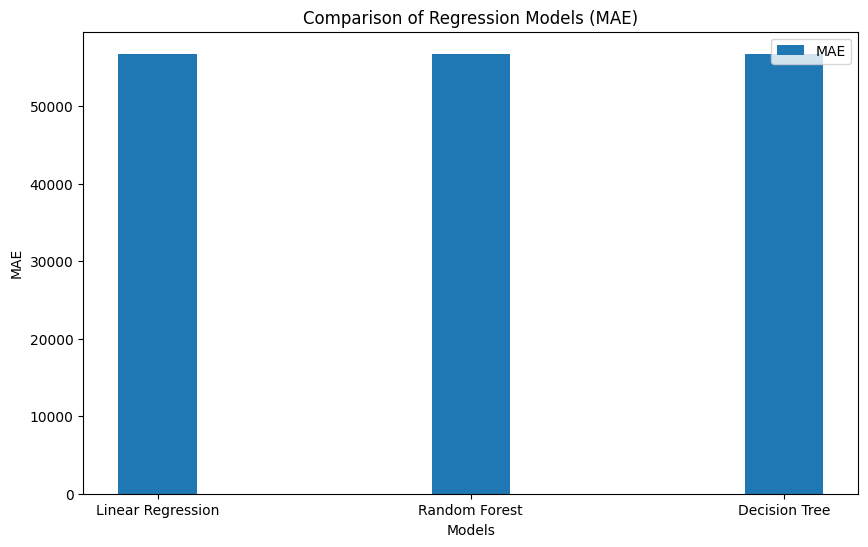

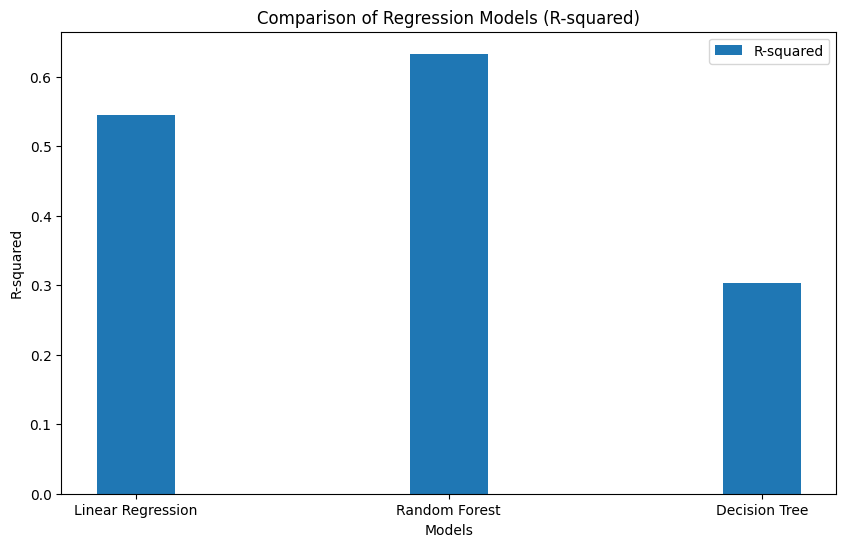

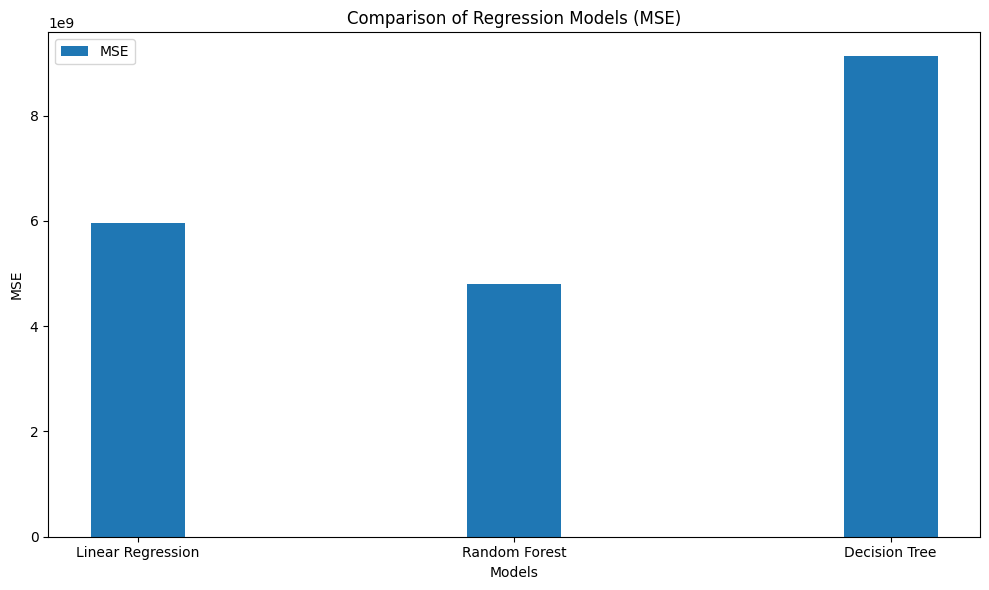

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(index, mae_values, bar_width, label='MAE')
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE')
ax1.set_title('Comparison of Regression Models (MAE)')
ax1.set_xticks(index)
ax1.set_xticklabels(models)
ax1.legend()

fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(index, r2_values, bar_width, label='R-squared')
ax2.set_xlabel('Models')
ax2.set_ylabel('R-squared')
ax2.set_title('Comparison of Regression Models (R-squared)')
ax2.set_xticks(index)
ax2.set_xticklabels(models)
ax2.legend()

fig, ax3 = plt.subplots(figsize=(10, 6))
ax3.bar(index , mse_values, bar_width, label='MSE')
ax3.set_xlabel('Models')
ax3.set_ylabel('MSE')
ax3.set_title('Comparison of Regression Models (MSE)')
ax3.set_xticks(index)
ax3.set_xticklabels(models)
ax3.legend()


plt.tight_layout()
plt.show()

# Conclusion
"""
Based on the evaluation metrics (MAE, MSE, and R-squared), the **Random Forest**
model appears to be the best-performing model for predicting California housing
prices. It has the lowest MAE and MSE and the highest R-squared, indicating
better accuracy and a better fit to the data.

While Linear Regression provides a simple baseline, its performance is lower compared
to the other two models. The Decision Tree model shows moderate performance but
might be prone to overfitting.

Further improvements could be explored through hyperparameter tuning and feature
engineering.

Limitations: This analysis is based on a specific dataset and a limited set of
models. Other models and data preprocessing techniques might yield different results.
"""